<h1> Imports </h1>

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

<h1> Build synthetic dataset </h1>

In [72]:
# Select configuration
num_components_plot = 1 # 1, 2, ...

In [73]:
# Build dataset

# Group red: centered at (-3, -3)
center = (-3, -3)
noise_scale = 1.0
num_samples = 80
x1_red = np.random.normal(center[0], noise_scale, num_samples)
x2_red = np.random.normal(center[1], noise_scale, num_samples)
labels_red = np.full(num_samples, 'r')

# Group blue: centered at (-5, 10)
center = (15, 10)
noise_scale = 3.0
num_samples = 100
x1_blue = np.random.normal(center[0], noise_scale, num_samples)
x2_blue = np.random.normal(center[1], noise_scale, num_samples)
labels_blue = np.full(num_samples, 'b')

df = pd.DataFrame({'X1': x1_red, 'X2': x2_red, 'Label': labels_red})
df = pd.concat([df, pd.DataFrame({'X1': x1_blue, 'X2': x2_blue, 'Label': labels_blue})], ignore_index=True)
df

,X1,X2,Label
0,-3.294924,-2.989087,r
1,-2.499334,-1.930154,r
2,-1.906311,-1.478594,r
3,-3.497288,-2.829044,r
4,-3.963305,-4.505991,r
...,...,...,...
175,11.322455,5.779294,b
176,17.231285,6.918698,b
177,10.227469,11.463135,b
178,19.243599,12.733380,b


In [74]:
# Get attributes and target variables
X = df[['X1', 'X2']]
y = df['Label']

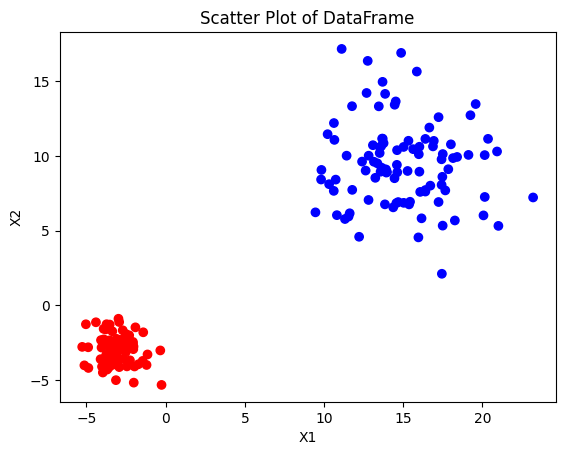

In [75]:
# Plot samples

plt.scatter(df['X1'], df['X2'], c=np.where(df['Label'] == 'r', 'red', 'blue'), marker='o', label=df['Label'])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot of DataFrame')
plt.show()


<h1> Pre-process data </h1>

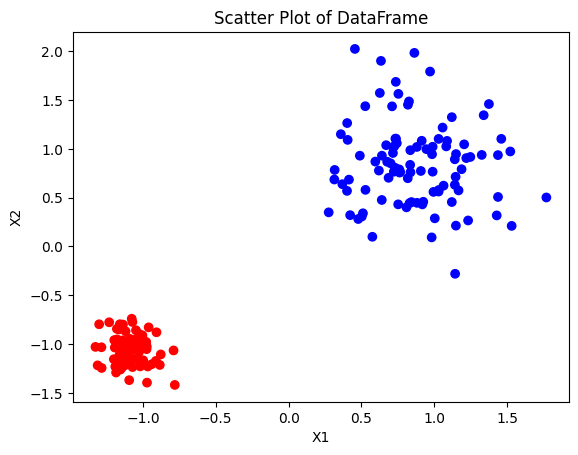

In [76]:
# Normalization to mean=0, deviation=1
X_std = StandardScaler().fit_transform(X)

# Visualize
plt.scatter(X_std[:,0], X_std[:,1], c=np.where(df['Label'] == 'r', 'red', 'blue'), marker='o', label=df['Label'])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot of DataFrame')
plt.show()

<h1> Apply PCA </h1>

In [77]:

# Coviariance matrix

covariance_matrix = np.cov(X_std.T)
print(f'\nCovariance matrix: \n {covariance_matrix} \n')

# Calculation of eigenvector/eigenvalue

eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
print(f'Eigenvectors \n {eigenvectors} \n')
print(f'Eigenvalues \n {eigenvalues} \n')


Covariance matrix: 
 [[1.00558659 0.91321312]
 [0.91321312 1.00558659]] 

Eigenvectors 
 [[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]] 

Eigenvalues 
 [0.09237347 1.91879971] 



In [78]:
# Fit PCA and get new dimensional space

pca = PCA()
pca.fit(X_std)
X_pca = pca.transform(X_std)


Individual variance explained: [1.91879971 0.09237347]

Cumulative variance explained: [1.91879971 2.01117318]

Cumulative variance explained ratio: [0.95406986 1.        ]


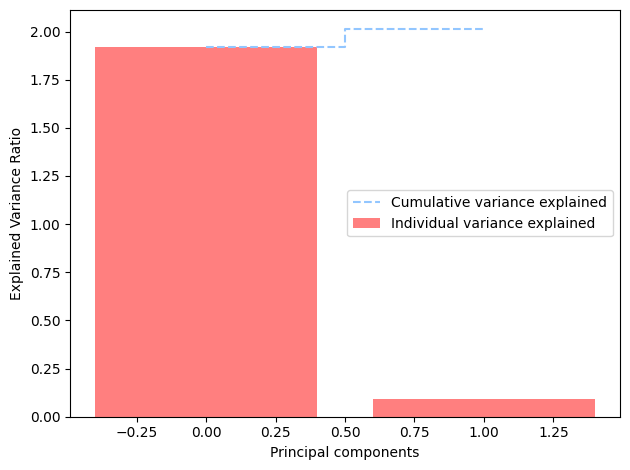

In [79]:
# Analyze explained variance

ind_exp_var = pca.explained_variance_
print(f'\nIndividual variance explained: {ind_exp_var}')
cum_exp_var = np.cumsum(ind_exp_var)
print(f'\nCumulative variance explained: {cum_exp_var}')
cum_exp_rat_var = np.cumsum(pca.explained_variance_ratio_)
print(f'\nCumulative variance explained ratio: {cum_exp_rat_var}')

num_dims = X.shape[1]
with plt.style.context('seaborn-pastel'):
    plt.figure()
    plt.bar(range(num_dims), ind_exp_var, alpha=0.5, align='center', label='Individual variance explained', color='r')
    plt.step(range(num_dims), cum_exp_var, where='mid', linestyle='--', label='Cumulative variance explained')
    plt.ylabel('Explained Variance Ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    

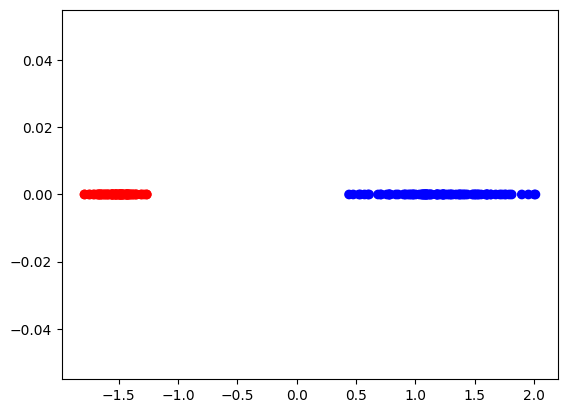

In [80]:
# Visualize results

if num_components_plot == 1:
    plt.scatter(X_pca[:, 0], np.zeros_like(X_pca[:, 0]), c=df['Label'])
elif num_components_plot == 2:
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Label'])